In [209]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

eps = 10**-2

Calculated distance: 36.70 km


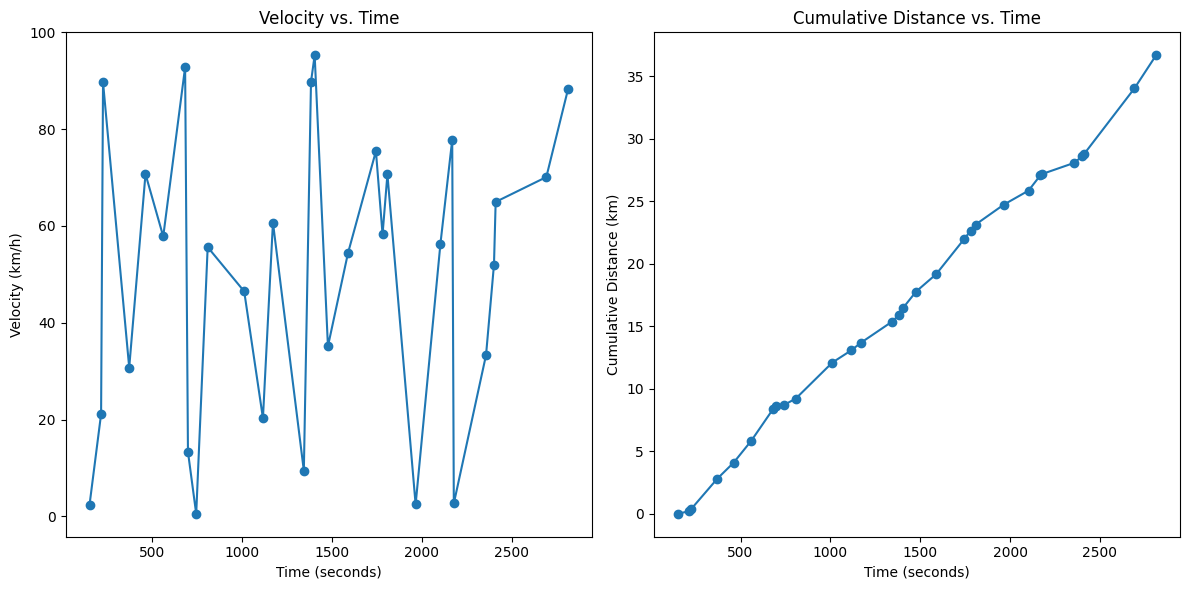

In [210]:
def calculate_distance(velocity, time):
    distance = 0.0
    for i in range(1, len(time)):
        time_diff = (time[i] - time[i-1]) / 3600
        avg_velocity = (velocity[i] + velocity[i-1]) / 2
        distance += avg_velocity * time_diff
    return distance

leng = 30
vel_max = 100
time_max = 3000

velocity = np.random.rand(leng)*vel_max

time = np.random.rand(leng)*time_max
time.sort()

distance = calculate_distance(velocity, time)

print(f"Calculated distance: {distance:.2f} km")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time, velocity, marker='o')
plt.title('Velocity vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (km/h)')

cumulative_distance = np.cumsum([0] + [((velocity[i] + velocity[i-1]) / 2) * ((time[i] - time[i-1]) / 3600) for i in range(1, len(time))])
plt.subplot(1, 2, 2)
plt.plot(time, cumulative_distance, marker='o')
plt.title('Cumulative Distance vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Distance (km)')

plt.tight_layout()
plt.show()


In [211]:
def f_1(x) : 
    return (np.e**(-(x)**2))*(np.log(x)**2)

def f_2(x) :
    return 1 / ((x**3) - (2*x) - 5)

def f_3(x) :
    return (x**5)*(np.e**(-x))*np.sin(x)

In [212]:
def simpsons_rule(x, y):
    n = len(x)
    
    if n < 3 or n % 2 == 0:
        raise ValueError("Number of intervals must be odd and at least 3.")
    
    h = (x[-1] - x[0]) / (n - 1)
    integral = y[0] + y[-1]
    
    for i in range(1, n-1, 2):
        integral += 4 * y[i]
        
    for i in range(2, n-2, 2):
        integral += 2 * y[i]
        
    integral *= h / 3
    return integral


In [213]:
def plot_graph(x_fine, y_fine, x, y) :
    plt.figure(figsize=(12, 6))

    y_fine_2 = [0]*len(x_fine)
    
    plt.plot(x_fine, y_fine, label='Function')
    plt.plot(x_fine, y_fine_2, color = 'black')
    plt.fill_between(x, y, alpha=0.2, label="Simpson's Rule Area")
    plt.scatter(x, y, color='red')
    plt.title("Function and Integration Areas")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    

In [214]:
def field(func = f_1, a = eps, b = 1, n = 19, multiplier = 1000) :
    
    x = np.linspace(a, b, n)
    y = func(x)
    simpson_result = simpsons_rule(x, y)
    check_result = sp.integrate.quad(func, a, b)[0]
    
    print(f"Simpson's rule result: {simpson_result:.6f}")
    print(f"Adaptive quadrature result: {check_result:.6f}")
    x_fine = np.linspace(a, b, multiplier*n)
    y_fine = func(x_fine)
    
    plot_graph(x_fine, y_fine, x, y)
    
    return "Passed" if (np.abs(simpson_result - check_result) < eps) else "Failed"

In [215]:
probe_size = 99

Simpson's rule result: 1.609582
Adaptive quadrature result: 1.608886


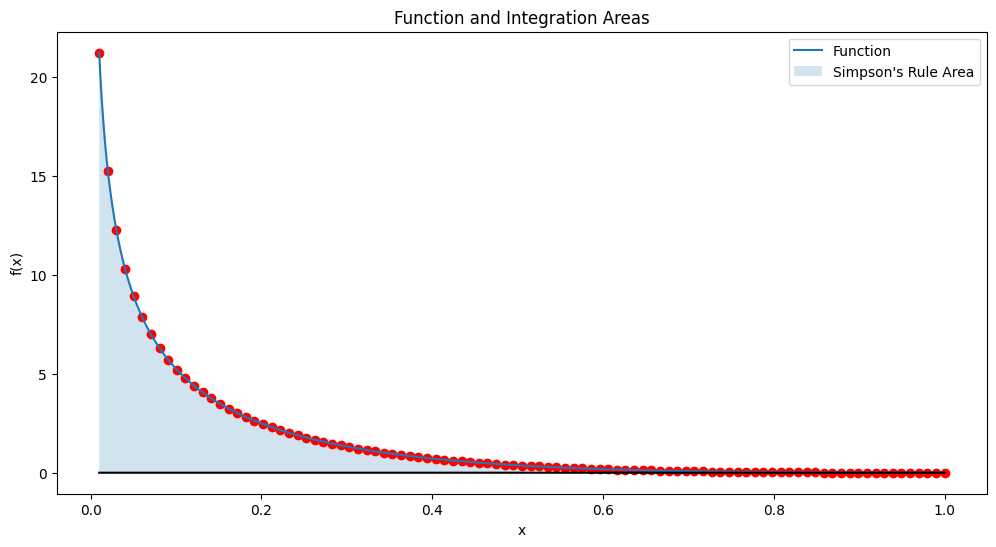

Passed


In [216]:
print(field(n = probe_size))

Simpson's rule result: -0.172545
Adaptive quadrature result: -0.172545


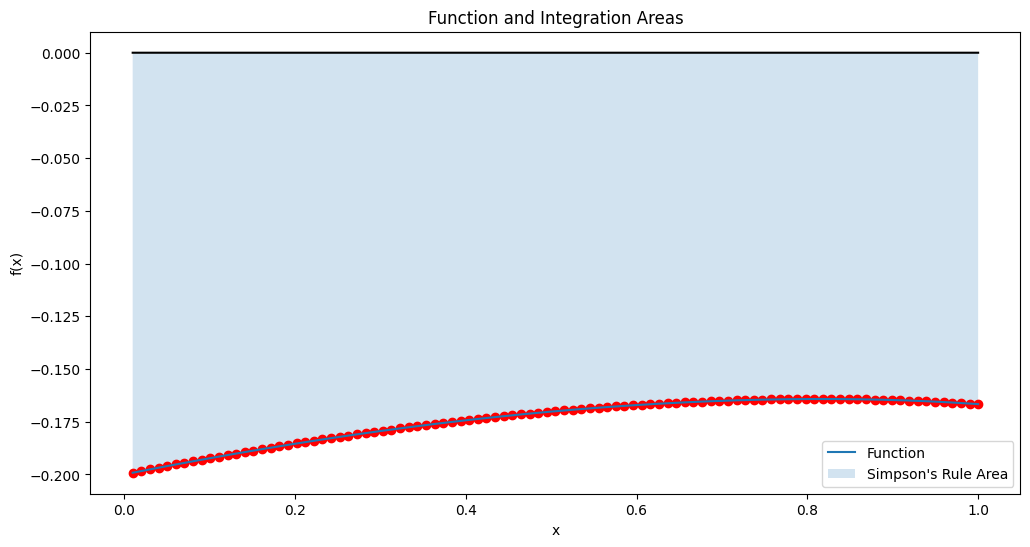

Passed


In [217]:
print(field(n = probe_size, func = f_2))

Simpson's rule result: 0.052670
Adaptive quadrature result: 0.052670


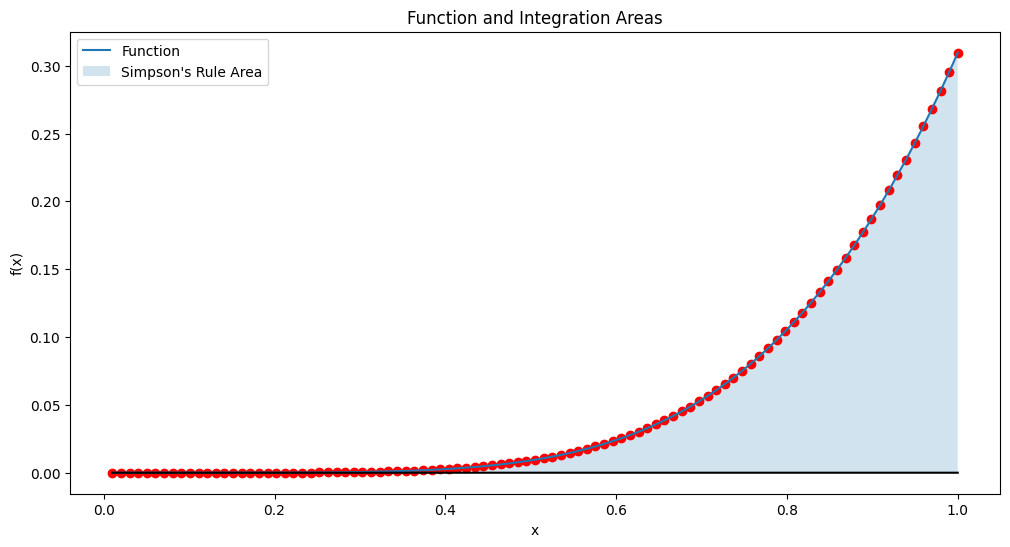

Passed


In [218]:
print(field(n = probe_size, func = f_3))

In [219]:
def f_4(x, y) :
    return 1 / ( (np.sqrt(x + y)) * (np.sqrt(1 + x + y)) ) if 0 <= x <= 1 and 0 <= y <= 1 - x else 0
    
def f_5(x, y) :
    return x**2 + y**2 if -3 <= x <= 3 and -5 <= y <= 5 else 0

In [220]:

x_lower = 0
x_upper = 1
y_lower = lambda x: 0
y_upper = lambda x: 1 - x

result, error = sp.integrate.dblquad(f_4, x_lower, x_upper, y_lower, y_upper)

# Wynik całki
print(f"Wartość oznaczonej całki podwójnej: {result:.6f}")
print(f"Szacowany błąd: {error:.6f}")

Wartość oznaczonej całki podwójnej: 0.532840
Szacowany błąd: 0.000000


Adaptive quadrature result: 680.000000
Adaptive quadrature estimated error: 0.000000
Grid size 5x5: Trapezoidal rule result: 765.000000
Grid size 10x10: Trapezoidal rule result: 696.790123
Grid size 20x20: Trapezoidal rule result: 683.767313
Grid size 50x50: Trapezoidal rule result: 680.566431
Grid size 100x100: Trapezoidal rule result: 680.138761
Grid size 200x200: Trapezoidal rule result: 680.034343
Grid size 500x500: Trapezoidal rule result: 680.005462


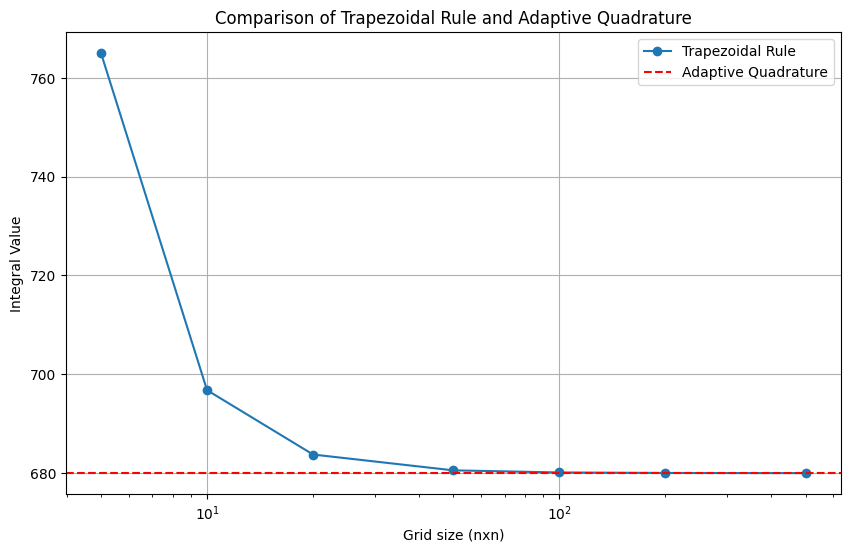

In [221]:
import numpy as np
import matplotlib.pyplot as plt

def f_5(x, y):
    return x ** 2 + y ** 2

def double_trapezoidal(f, x_min, x_max, y_min, y_max, nx, ny):
    x = np.linspace(x_min, x_max, nx)
    y = np.linspace(y_min, y_max, ny)
    hx = (x_max - x_min) / (nx - 1)
    hy = (y_max - y_min) / (ny - 1)
    
    integral = 0.0
    for i in range(nx):
        for j in range(ny):
            weight = 1
            if i == 0 or i == nx-1:
                weight *= 0.5
            if j == 0 or j == ny-1:
                weight *= 0.5
            integral += weight * f(x[i], y[j])
    integral *= hx * hy
    return integral

def calculate_integral_adaptive(f, x_min, x_max, y_min, y_max):
    result, error = sp.integrate.dblquad(f, x_min, x_max, lambda x: y_min, lambda x: y_max)
    return result, error

x_min, x_max = -3, 3
y_min, y_max = -5, 5

adaptive_result, adaptive_error = calculate_integral_adaptive(f_5, x_min, x_max, y_min, y_max)
print(f"Adaptive quadrature result: {adaptive_result:.6f}")
print(f"Adaptive quadrature estimated error: {adaptive_error:.6f}")

grid_sizes = [5, 10, 20, 50, 100, 200, 500]
trapezoidal_results = []

for n in grid_sizes:
    result = double_trapezoidal(f_5, x_min, x_max, y_min, y_max, n, n)
    trapezoidal_results.append(result)
    print(f"Grid size {n}x{n}: Trapezoidal rule result: {result:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, trapezoidal_results, label='Trapezoidal Rule', marker='o')
plt.axhline(adaptive_result, color='r', linestyle='--', label='Adaptive Quadrature')
plt.xlabel('Grid size (nxn)')
plt.ylabel('Integral Value')
plt.title('Comparison of Trapezoidal Rule and Adaptive Quadrature')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()
